<center>
<h1>MLDM Monday - What are you, Julia?</h1>
<img src="img/julia_logo.png" width=200 height=150/>
<h2>
<font color='black'>
Yin-Chen Liao (Dboy)
</font>
</h2>
</center>

# Is Julia Object-Oriented, Functional or What?

我想在座的各位身為 R, Python 或其他許多主流語言的使用者，

對於 OOP 或 Functional Programming 應該都不陌生，

在接觸 Julia 這個新語言的時候，

想必很自然地會問這樣的問題: Julia 到底是個怎樣的語言?

### 引自 Julia [官方文件](http://julia.readthedocs.org/en/latest/manual/introduction/):

<pre>
Julia features optional typing, multiple dispatch, and good performance, achieved using type inference and just-in-time (JIT) compilation, implemented using LLVM. <strong>It is multi-paradigm, combining features of imperative, functional, and object-oriented programming.</strong>
</pre>

所以我想，如果 Julia 是活生生的動物的話，

大概長這樣吧....


<center>
<img src=http://163.20.173.57/stud96/919/33/p2/1.jpg />
</center>



因此會著重在下面幾個重點:

1. Julia 的 Type System
2. Methods
3. 聽說 Julia 很快? 
  - Loops in Julia: 以碎形為例。
  - 實作 Simple Neural Network: Julia v.s Python(Numpy)
4. 如何學習 Julia:
  - Document 。
  - Julia 原始碼。例如 base.jl --> 重要的 Julia 核心 code

有時間的機會的話....

 - Parallel Computation in Julia (CPU-bound)
 - Socket Programming in Julia

## Type System

<pre>
Describing Julia in the lingo of type systems, <strong>it is: dynamic, nominative and parametric.</strong> Generic types can be parameterized, and the hierarchical relationships between types are explicitly declared, rather than implied by compatible structure. 
</pre>

因為 Julia 是 dynamic typed (and optionally static typed)，

所以其實使用者可以完全不宣告變數形態，

Julia 的 jit 會自動幫你找出變數形態。(伴隨著效能損失)

粗略地來說，Julia 裡的 DataType 又可粗分成下列幾種:

- Abstract Type
  - 可以被繼承，但不能生成實例。
- Concrete Type
  - 可以生成實例，但不可以被繼承。
- Composite Type
  - 常用于自定義資料結構，類似 C 的 struct
  - 是 Concrete Type 的一種。
- Parametric Type 
  - 類似 C++ 的 Template

<center>
<h2> Overlook of Type System in Julia </h2>

<img src="img/Type_Sys_Julia.png"/>
</center>

嗯....我知道有說等於沒說

我們來看一些例子。

In [1]:
# 自定義 "男人" 類別 
type Man
    gender::String       # 屬性 (attribute):: 資料形態
    first_name::String
    last_name::String
    
    function Man(fn::String, ln::String)
        gender = "Male"
        new(gender, fn, ln)
    end
end

In [2]:
type Woman
    gender::String
    first_name::String
    last_name::String
    
    function Woman(fn::String, ln::String)
        gender = "Female"
        new(gender, fn, ln)
    end
end

In [4]:
# String Interpolation
me = Man("Yin-Chen", "Liao");
println("Man:")
println("My first name is $(me.first_name).")
println("My last name is ", me.last_name, '.')
println()

girl_friend = Woman("Donot", "Exists")
println("Woman:")
println("I, $(girl_friend.first_name) $(girl_friend.last_name),", " am $(me.first_name)'s girl friend.")

Man:
My first name is Yin-Chen.
My last name is Liao.

Woman:
I, Donot Exists, am Yin-Chen's girl friend.


In [4]:
# 自定義 + 法
function +(man::Man, woman::Woman)
    ind = rand(1:2)
    child_first_name = woman.first_name
    child_last_name = man.last_name
    if ind == 2
        child_first_name, child_last_name = man.first_name, woman.last_name
        return Woman(child_first_name, child_last_name)
    end
    return Man(child_first_name, child_last_name)
end

+(woman::Woman, man::Man) = +(man, woman)

+ (generic function with 120 methods)

In [5]:
me + girl_friend

Man("Male","Yin-Chen","Exists")

In [6]:
me + girl_friend

Woman("Female","Donot","Liao")

### 用 code 支持多元成家!

誰說只有 "男人 + 女人" 或者 "女人 + 男人" !?

只要有愛，人人皆可成家。

但懶惰如我或工程師心中獨白: 要定義 4 個 `+` 好麻煩喔....。

用 `Abstract Type` 簡化 code !

In [1]:
# 定義一個 abstract type `Human`
abstract Human

type Man <: Human  # 簡單加上這一行
    gender::String
    first_name::String
    last_name::String
    
    function Man(fn::String, ln::String)
        gender = "Male"
        new(gender, fn, ln)
    end
end

type Woman <: Human # 簡單加上這一行
    gender::String
    first_name::String
    last_name::String
    
    function Woman(fn::String, ln::String)
        gender = "Female"
        new(gender, fn, ln)
    end
end

In [2]:
# 只要定義一次 + 在 `Human` 上就可以用在所有 `Man` 跟 `Woman` 的組合上。
function +(h1::Human, h2::Human)  
    child_gender = h1.gender
    child_first_name = h2.first_name
    child_last_name = h1.last_name
    ind1 = rand(1:2)
    ind2 = rand(1:2)
    if ind2 == 2
        child_first_name, child_last_name = h1.first_name, h2.last_name
    end
    if ind1 == 2
        child_gender = h2.gender
    end
    if child_gender == "Male"
        return Man(child_first_name, child_last_name)
    else
        return Woman(child_first_name, child_last_name)
    end
end

+ (generic function with 119 methods)

In [3]:
# 滿足你對 Snoopy 的(腐)想像 ~(=  w  =)~

charlie = Man("Charlie", "Brown")
linusvan = Man("Linusvan", "Pelt")
lucy = Woman("Lucy", "Pelt")
sally = Woman("Sally", "Brown")

println("Charlie and Lucy have a child: ", charlie + lucy)
println("Charlie and Linusvan adopt a child: ", charlie + linusvan)
println("Sally and Lucy adopt another child: ", sally + lucy)

Charlie and Lucy have a child: Woman("Female","Lucy","Brown")
Charlie and Linusvan adopt a child: Man("Male","Linusvan","Brown")
Sally and Lucy adopt another child: Woman("Female","Sally","Pelt")


## Parametric Type

- 在 Julia 裡，可以為 type 加上 parameter 。
- 很抱歉我沒想到什麼通俗的例子
  - 關於這個主題我會用線性代數裡的 Vector space 來做例子


試想你想要在操作一個 2 維的向量空間，

同樣是 2 為向量空間可以有不同的 field 。

舉例來說 $\mathbb{R}^2$, $\mathbb{C}^2$ ...etc。

那你可能會這樣做:

In [4]:
# Vector space over R
type VectorOverR
    x::Float64
    y::Float64
end

# Vector space over C
type VectorOverC
    x::Complex{Float64}
    y::Complex{Float64}
end

v_r = VectorOverR(1.1, 2.3);
v_c = VectorOverC(1. + 3.im, 2.1 + 3.5im);

In [5]:
println("v_r: ", v_r)
println("v_c: ", v_c)

v_r: VectorOverR(1.1,2.3)
v_c: VectorOverC(1.0 + 3.0im,2.1 + 3.5im)


OK....我知道這會動，但是....

- 難不成我有 10 種 Field 我就要寫 10 種 Vector space!?
- 這些 code 都長好像喔，我一定要浪費時間在這種重複性的 code 嗎?
- 你不知道 python 有個很好的準則叫做 DRY 嗎? (Donot Repeat Yourself)
- 我不想寫這種 code !!(吼)


用 parametric type 去簡化 code:


In [6]:
type VectorSpace{T}
    x::T
    y::T
end

v_r = VectorSpace{Float64}(1.1, 2.3);
v_c = VectorSpace{Complex{Float64}}(1., 2.);

In [7]:
println("v_r: ", v_r)
println("v_c: ", v_c)

v_r: VectorSpace{Float64}(1.1,2.3)
v_c: VectorSpace{Complex{Float64}}(1.0 + 0.0im,2.0 + 0.0im)


## Functions

### Multiple Dispaching

- `methodswith`
- `methods`
- `@which`

In [9]:
function add(a::String, b::String)
    join([a, b], "")
end

function add(a::Number, b::Number)
    a + b
end

function add(a::Float64, b::Float64)
    a + b
end

function add(a, b)  # a, b 的 type 都是 Any!
    a + b
end

add (generic function with 4 methods)

In [10]:
methods(add)

# 4 methods for generic function "add":
add(a::String,b::String) at In[9]:2
add(a::Float64,b::Float64) at In[9]:10
add(a::Number,b::Number) at In[9]:6
add(a,b) at In[9]:14

In [11]:
a = 1; b = 2;
@which add(a, b)

add(a::Number,b::Number) at In[9]:6

In [12]:
a = "Ju"; b = "lia";
@which add(a, b)

add(a::String,b::String) at In[9]:2

In [12]:
methodswith(Human)

1-element Array{Method,1}:
 +(h1::Human,h2::Human) at In[2]:3

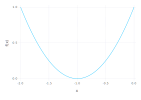

In [13]:
f(x) = x^2 + 2x + 1

import Gadfly: plot

plot(f, -2, 0)

嗯....那看來不加 `::` 好像也不錯嘛~

差別可大了！讓我們用 `code_native` 來看看它們的差別:

In [5]:
code_native(add, (Any, Any))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[1]
Source line: 10
	push	RBP
	mov	RBP, RSP
	push	RBX
	sub	RSP, 40
	mov	QWORD PTR [RBP - 40], 4
Source line: 10
	movabs	RBX, 4524530944
	mov	RAX, QWORD PTR [RBX]
	mov	QWORD PTR [RBP - 32], RAX
	lea	RAX, QWORD PTR [RBP - 40]
	mov	QWORD PTR [RBX], RAX
	xorps	XMM0, XMM0
	movups	XMMWORD PTR [RBP - 24], XMM0
	cmp	EDX, 2
	jne	55
	lea	RAX, QWORD PTR [RBP - 24]
	movups	XMM0, XMMWORD PTR [RSI]
Source line: 10
	movups	XMMWORD PTR [RBP - 24], XMM0
	movabs	RCX, 4511330048
	movabs	RDI, 140663886212224
	mov	RSI, RAX
	mov	EDX, 2
	call	RCX
	mov	RCX, QWORD PTR [RBP - 32]
	mov	QWORD PTR [RBX], RCX
	add	RSP, 40
	pop	RBX
	pop	RBP
	ret
Source line: 10
	movabs	RAX, 4511347696
	movabs	RDI, 4552171536
	call	RAX


In [8]:
code_native(add, (Number, Number))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[1]
Source line: 6
	push	RBP
	mov	RBP, RSP
	push	RBX
	sub	RSP, 40
	mov	QWORD PTR [RBP - 40], 4
Source line: 6
	movabs	RBX, 4524530944
	mov	RAX, QWORD PTR [RBX]
	mov	QWORD PTR [RBP - 32], RAX
	lea	RAX, QWORD PTR [RBP - 40]
	mov	QWORD PTR [RBX], RAX
	xorps	XMM0, XMM0
	movups	XMMWORD PTR [RBP - 24], XMM0
	cmp	EDX, 2
	jne	55
	lea	RAX, QWORD PTR [RBP - 24]
	movups	XMM0, XMMWORD PTR [RSI]
Source line: 6
	movups	XMMWORD PTR [RBP - 24], XMM0
	movabs	RCX, 4511330048
	movabs	RDI, 140663886212224
	mov	RSI, RAX
	mov	EDX, 2
	call	RCX
	mov	RCX, QWORD PTR [RBP - 32]
	mov	QWORD PTR [RBX], RCX
	add	RSP, 40
	pop	RBX
	pop	RBP
	ret
Source line: 6
	movabs	RAX, 4511347696
	movabs	RDI, 4552171536
	call	RAX


In [13]:
code_native(add, (Float64, Float64))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[9]
Source line: 10
	push	RBP
	mov	RBP, RSP
Source line: 10
	addsd	XMM0, XMM1
	pop	RBP
	ret


## 聽說 Julia 很快?

用之前在 Data Science Conference 2014 用過的例子

<img src=http://dboyliao.github.io/RBasic_reveal/assets/img/Barnsley_Fern_40000.png width=500 height=400>

<center>
  <a href=http://dboyliao.github.io/RBasic_reveal/#/14>說明</a>
</center>

### 用 python 做一遍:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from random import random

def barnsley_fern_fractal(start, maxiter = 20000):
    
    points = []
    p = start
    for i in range(maxiter):
        ind = random()
        if ind < 0.05:
            m = np.array([[0, 0], [0, 0.16]])
            const = np.array([0., 0.]).reshape(2, 1)
        elif 0.05 <= ind < 0.86:
            m = np.array([[0.85, 0.04], [-0.04, 0.85]])
            const = np.array([0., 0.16]).reshape(2, 1)
        elif 0.86 <= ind < 0.93:
            m = np.array([[0.2, -0.26], [0.23, 0.22]])
            const = np.array([0., 0.16]).reshape(2, 1)
        else:
            m = np.array([[-0.15, 0.28], [0.26, 0.24]])
            const = np.array([0., 0.44]).reshape(2, 1)
        p = np.dot(m, p) + const
        points.append(p)
    return points

In [2]:
%time r = barnsley_fern_fractal(np.array([0, 0]).reshape(2, 1)) # 大概要 0.25 秒

CPU times: user 229 ms, sys: 9.39 ms, total: 239 ms
Wall time: 234 ms


(-0.1, 1.1)

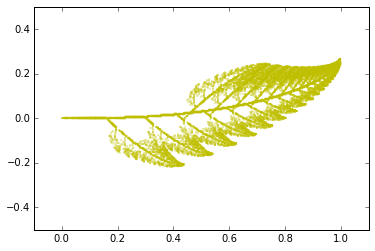

In [3]:
x = [p[0] for p in r]
y = [p[1] for p in r]

plt.scatter(y, x, marker = ".", c='y', linewidths = 0, alpha = 0.3)
plt.ylim(-0.5, 0.5)
plt.xlim(-0.1, 1.1)

### 換成 Julia 做一次

In [1]:
function barnsley_fern_fractal(start:: Vector{Float64}; maxiter = 20000)
    points = Any[]
    p = start
    for i = 1:maxiter
        ind = rand()
        if ind < 0.05
            m = [0. 0.; 0. 0.16]
            constant = [0. ; 0.]
        elseif 0.05 <= ind < 0.86
            m = [0.85 0.04; -0.04 0.85]
            constant = [0. ; 0.16]
        elseif 0.86 <= ind < 0.93
            m = [0.2 -0.26; 0.23 0.22]
            constant = [0.; 0.16]
        else
            m = [-0.15 0.28; 0.26 0.24]
            constant = [0.; 0.44]
        end
        p = m * p + constant
        push!(points, p)
    end
    return points
end

barnsley_fern_fractal (generic function with 1 method)

In [2]:
@time points = barnsley_fern_fractal([0.; 0.]);# 第一次跑會比較慢 (但還是快了 2 倍)

elapsed time: 0.112934957 seconds (11487116 bytes allocated)


20000-element Array{Any,1}:
 [0.0,0.16]           
 [-0.0416,0.1952]     
 [-0.027552,0.327584] 
 [-0.0103158,0.439548]
 [0.124621,0.54281]   
 [0.12764,0.616403]   
 [0.13315,0.678837]   
 [0.140331,0.731686]  
 [0.148549,0.776319]  
 [0.157319,0.81393]   
 [0.166279,0.845547]  
 [0.0,0.135288]       
 [0.0054115,0.274994] 
 ⋮                    
 [0.160877,0.62701]   
 [0.161825,0.686523]  
 [0.165013,0.737072]  
 [0.169744,0.779911]  
 [0.175478,0.816134]  
 [0.181802,0.846695]  
 [0.0,0.135471]       
 [0.00541885,0.275151]
 [0.015612,0.393661]  
 [0.0290167,0.493988] 
 [0.133964,0.566101]  
 [0.136513,0.635828]  

In [3]:
@time points = barnsley_fern_fractal([0.; 0.]); # JIT 做完最佳化後可以快到 20 倍

elapsed time: 0.00868704 seconds (8525408 bytes allocated)


20000-element Array{Any,1}:
 [0.0,0.16]           
 [0.0064,0.296]       
 [0.01728,0.411344]   
 [-0.103493,0.25447]  
 [-0.0777906,0.380439]
 [-0.0509045,0.486485]
 [-0.0238094,0.575548]
 [0.164725,0.571941]  
 [0.0,0.0915106]      
 [0.00366042,0.237784]
 [0.0126227,0.36197]  
 [0.0252081,0.46717]  
 [0.127026,0.558675]  
 ⋮                    
 [0.149018,0.602838]  
 [0.150779,0.666451]  
 [0.15482,0.720452]   
 [0.178504,0.653162]  
 [0.177855,0.708047]  
 [0.179498,0.754726]  
 [-0.160329,0.367324] 
 [-0.121587,0.478639] 
 [-0.0842032,0.571707]
 [-0.0487045,0.649319]
 [-0.0154261,0.713869]
 [0.0154426,0.767406] 

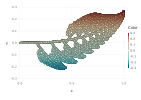

In [5]:
using Gadfly

x = [ p[1] for p in points]
y = [ p[2] for p in points]

plot(x = y, y = x, color = y, Geom.PointGeometry)

<center>
<br/>
<h1>Parallel Computation</h1>
<br/>
<h2><font color=orange>Computing the Distance Matrix</font></h2>
</center>

In [15]:
data = rand(1000, 50); # 假造的 data
data[1:10, :]

10x50 Array{Float64,2}:
 0.593439  0.59856     0.480018   …  0.0684086  0.342381   0.122193 
 0.944821  0.575646    0.0111307     0.944269   0.0186117  0.775795 
 0.128075  0.735217    0.499427      0.0172363  0.462189   0.0691979
 0.72817   0.50768     0.555614      0.380484   0.425046   0.769292 
 0.825713  0.178622    0.499892      0.823706   0.952087   0.413401 
 0.979259  0.858225    0.479014   …  0.28558    0.89973    0.828038 
 0.195134  0.00870272  0.789546      0.0609604  0.565645   0.675201 
 0.540299  0.203851    0.326086      0.288453   0.909922   0.987507 
 0.336337  0.0446847   0.740193      0.463414   0.425116   0.579163 
 0.19005   0.718749    0.753718      0.965381   0.415758   0.735861 

In [16]:
size(data)

(1000,50)

In [17]:
# 計算所有資料點間的歐式幾何距離。
function dist(data::Array{Float64, 2})
    m, n = size(data)
    dist_matrix = zeros(m, m)
    for i = 1:m, j = 1:i
        x = data[i, :]
        y = data[j, :]
        diff = x - y
        d = sqrt(dot(diff[:], diff[:]))
        dist_matrix[i, j] = dist_matrix[j, i] = d
    end
    return dist_matrix
end

dist (generic function with 1 method)

In [18]:
@time d = dist(data);
d[1:10, :]

elapsed time: 1.447786678 seconds (1177631152 bytes allocated, 53.62% gc time)


10x1000 Array{Float64,2}:
 0.0      2.78673  2.67064  2.69114  …  2.62652  2.68463  3.28751  2.95109
 2.78673  0.0      3.34682  2.79249     3.26076  2.32063  2.84891  3.49959
 2.67064  3.34682  0.0      2.50461     2.25845  2.63037  3.31793  2.65347
 2.69114  2.79249  2.50461  0.0         3.05434  2.76116  2.80204  3.05478
 3.1809   3.10729  3.23798  3.23302     3.03262  2.94701  3.24804  3.06136
 2.96801  3.1319   3.14213  2.61566  …  3.40003  3.1947   3.17489  3.07381
 2.87632  3.15447  3.2149   2.68411     3.17037  3.08363  3.03056  3.35324
 2.78351  2.91828  2.49234  2.58659     2.86969  2.59804  3.36913  2.79706
 2.88515  3.42661  3.03428  3.18548     3.08039  2.98347  3.36957  2.73578
 2.55587  2.67622  2.52764  2.55617     2.8243   3.0629   2.85235  2.7711 

In [19]:
# 加入平行化
function dist_parallel(data::Array{Float64, 2})
    m, n = size(data)
    dist_matrix = zeros(m, m)
    @parallel for i = 1:m
        for j = 1:i
            x = data[i, :]
            y = data[j, :]
            diff = x - y
            d = sqrt(dot(diff[:], diff[:]))
            dist_matrix[i, j] = dist_matrix[j, i] = d
        end
    end
    return dist_matrix
end

dist_parallel (generic function with 1 method)

In [20]:
@time d_p = dist_parallel(data);
d_p[1:10, :]

elapsed time: 0.013045364 seconds (8132736 bytes allocated)


10x1000 Array{Float64,2}:
 0.0      2.78673  2.67064  2.69114  …  2.62652  2.68463  3.28751  2.95109
 2.78673  0.0      3.34682  2.79249     3.26076  2.32063  2.84891  3.49959
 2.67064  3.34682  0.0      2.50461     2.25845  2.63037  3.31793  2.65347
 2.69114  2.79249  2.50461  0.0         3.05434  2.76116  2.80204  3.05478
 3.1809   3.10729  3.23798  3.23302     3.03262  2.94701  3.24804  3.06136
 2.96801  3.1319   3.14213  2.61566  …  3.40003  3.1947   3.17489  3.07381
 2.87632  3.15447  3.2149   2.68411     3.17037  3.08363  3.03056  3.35324
 2.78351  2.91828  2.49234  2.58659     2.86969  2.59804  3.36913  2.79706
 2.88515  3.42661  3.03428  3.18548     3.08039  2.98347  3.36957  2.73578
 2.55587  2.67622  2.52764  2.55617     2.8243   3.0629   2.85235  2.7711 

In [21]:
d_p[1:10, :] == d[1:10, :]

true

<center>
<h1>Socket Programming</h1>

<h2>
  <font color=orange>SAAF - Socket as a Framework!</font>
</h2>
<br/>
<br/>
</center>

## 如果你對 Socket 不熟....

基本口訣: BLAB

- B: Bind
  - 把 socket bind 到某個特定的 port
- L: Listening
  - 開始監聽
  - 也就是開始偵測有無連線要求
- A: Accept
  - 接受連線要求
- B: Begin
  - 開始處理要求
  
等等會示範，別急。

<center>
<br/>
<br/>
<font size=15>Simple Fibonacci Server</font>
<br/>
<br/>
<br/>
<font color=blue size=6>Live Demo</font>
<br/>
</center>

<center>
這是學 David Beazley 的....XD
<br/>
<br/>
<a href=https://www.youtube.com/watch?v=MCs5OvhV9S4>影片</a>
</center>

<center>
<h1><font size=8 color=orange>NCCU - PyDay</font></h1>
<br/>
<br/>
<a href="http://pycontw.kktix.cc/events/pyconapac2015-sprint">
<img src="img/PyDay_Logo.jpg">
</a>
<br/>
</center>



<h2><font size=6>講者簡介</font></h2>

- Robert Bradshaw：Cython 開發者。讓你的 Python 有 C 一般的效能。
- Steven Johnson：Julia 核心開發成員。
- Arnavd Bergeron：Theano 開發成員，喜歡 GPU 平行運算的您絕對不能錯過！
- Travis Oliphant：Numpy 開發成員，有用 Python 的朋友一定對這套件不陌生，而這次他要來演講的是 Numba。


## References

- [Julia 官方文件](http://julia.readthedocs.org/en/latest/)
- [JIT (Just-In-Time) compiler](http://stackoverflow.com/questions/95635/what-does-a-just-in-time-jit-compiler-do)  [StackOverflow]
- [LLVM](http://aosabook.org/en/llvm.html)
- [Getting Started with Julia](https://www.packtpub.com/application-development/getting-started-julia-programming/)
- [Mutual Recursion in Julia](http://blog.zachallaun.com/post/jumping-julia)
- [TCP/IP Socket in Julia](http://blog.leahhanson.us/using-tcp-sockets-in-julia.html)
- [Julia Tutorial - kNN algorithm](https://www.kaggle.com/c/street-view-getting-started-with-julia/details/knn-tutorial) [Kaggle]
- [Abstract Type With Fields](https://github.com/JuliaLang/julia/issues/4935)

<center>
<img src="https://www.packtpub.com/sites/default/files/4795OS_B00946_Getting%20started%20with%20Julia%20Programming%20Language_0.jpg" width=250 height=350/>
</center>

<div class='reveal'>
 <center>
 <font size=16> Thanks for your attention </font>
 </center>
</div>
<br>
<br>
<div class='reveal'>
  <div class='fragment'>
  <center>
    <font size=10 color=blue>Q/A</font>
  </center>
  </div>
</div>

## Typos Found in the Doc

- [C Interface](http://julia.readthedocs.org/en/latest/manual/calling-c-and-fortran-code/)

In [31]:
# Pointer type in Julia
Ptr

Ptr{T}

In [49]:
function getenv(var::String)
  val = ccall((:getenv, "libc"),
    Ptr{Uint8}, (Ptr{Uint8},), var)
  if val == C_NULL
    error("getenv: undefined variable: ", var)
  end
  bytestring(val)
end

getenv (generic function with 1 method)

In [50]:
getenv("SHELL")

"/bin/bash"